In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import plot_model

import keras 
from keras.models import Sequential # intitialize the ANN
from keras.layers import Dense, Activation, Dropout      # create layers

np.random.seed(42)
tf.random.set_seed(42)
# show all columns when displaying a data frame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
dtypes = {'country':'category', 'cat_name':'category', 'cat_slug':'category', 'loc_name':'category', 
'loc_country':'category', 'loc_state':'category', 'loc_type':'category', 'main_category':'category', 
'sub_category':'category', 'goal_categorical':'category', 'currency':'category', 'usd_type':'category'}
frame_all = pd.read_csv('data/Kickstarter_full.csv', index_col=0, parse_dates=['created_at', 'launched_at', 'deadline', 'state_changed_at'], dtype=dtypes)

In [3]:
columns = frame_all.columns

In [4]:
to_delete = ['backers_count',
 'blurb',
 'created_at',
 'converted_pledged_amount',
 'currency_symbol',
 'currency_trailing_code',
 'current_currency',
 'deadline',
 'goal',
 'id',
 'is_starrable',
 'launched_at',
 'name',
 'pledged',
 'slug',
 'source_url',
 'spotlight',
 'staff_pick',
 'state',
 'state_changed_at',
 'usd_pledged',
 'cat_name',
 'cat_slug',
 'loc_name',
 'loc_country',
 'loc_state',
 'photo_thumb',
 'photo_large',
 'project_address',
 'profile_photo',
 'creator_name',
 'creator_id',
 'creator_thumb',
 'creator_address',
 'goal_surpass',
 'goal_surpass_share',
 'goal_surpass_usd',
 'baseline',
 'disable_communication']

In [5]:
frame_all.drop(columns=to_delete, inplace=True)

In [6]:
# Save category-column-names in list
categorical_cols = frame_all.select_dtypes(include='category').columns

#import pandas as pd
frame_all = pd.get_dummies(frame_all, columns = categorical_cols, drop_first=True)

In [7]:
X = frame_all.drop('state_bool', axis=1)
y = frame_all.state_bool

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [9]:
X_train.shape

(126507, 221)

In [25]:
# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = 221))
model.add(Dropout(0.2))
model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               28416     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                

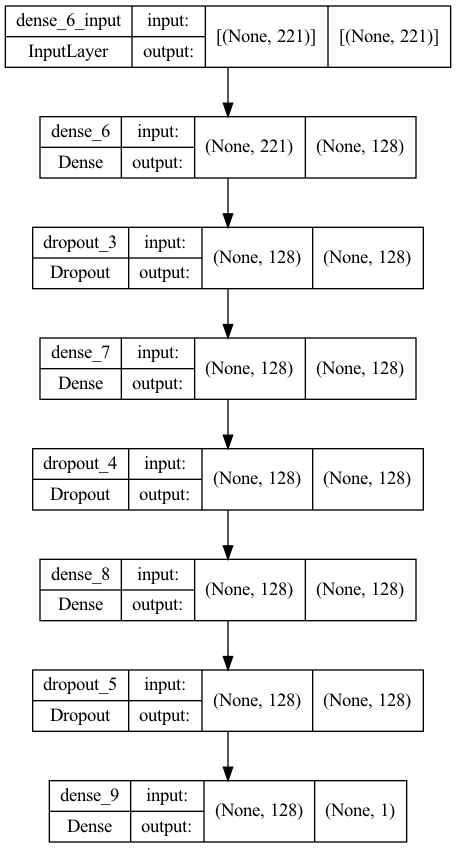

In [26]:
plot_model(
    model, to_file='model.png', show_shapes=True, 
    show_layer_names=True, dpi=96
)

In [30]:
# Train the ANN
training = model.fit(X_train, y_train, batch_size = 128, validation_split=0.2, epochs = 50)

Epoch 1/50
791/791 [==============================] - 18s 23ms/step - loss: 0.6859 - accuracy: 0.5602 - val_loss: 0.6854 - val_accuracy: 0.5621
Epoch 2/50
791/791 [==============================] - 7s 9ms/step - loss: 0.6859 - accuracy: 0.5602 - val_loss: 0.6854 - val_accuracy: 0.5621
Epoch 3/50
791/791 [==============================] - 7s 9ms/step - loss: 0.6859 - accuracy: 0.5602 - val_loss: 0.6854 - val_accuracy: 0.5621
Epoch 4/50
791/791 [==============================] - 7s 9ms/step - loss: 0.6859 - accuracy: 0.5602 - val_loss: 0.6854 - val_accuracy: 0.5621
Epoch 5/50
791/791 [==============================] - 7s 9ms/step - loss: 0.6859 - accuracy: 0.5602 - val_loss: 0.6854 - val_accuracy: 0.5621
Epoch 6/50
791/791 [==============================] - 8s 10ms/step - loss: 0.6859 - accuracy: 0.5602 - val_loss: 0.6854 - val_accuracy: 0.5621
Epoch 7/50
791/791 [==============================] - 7s 9ms/step - loss: 0.6859 - accuracy: 0.5602 - val_loss: 0.6854 - val_accuracy: 0.5621
Epo

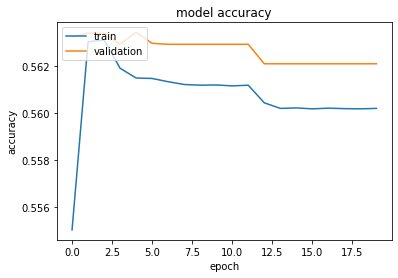

In [28]:
# summarize history for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [14]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title('Model Loss')
    plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

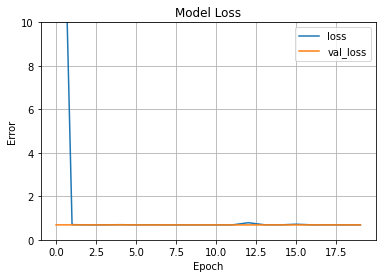

In [29]:
plot_loss(history=training)

In [20]:
# Evaluate the model on test set using .evaluate
loss, acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Model Accuracy: {acc}')
print(f'Model Loss: {loss}')


1318/1318 - 4s - loss: 0.6858 - accuracy: 0.5605 - 4s/epoch - 3ms/step
Model Accuracy: 0.5605406761169434
Model Loss: 0.6858009099960327
